<a href="https://colab.research.google.com/github/ArseniyKoz/uni.ml/blob/t2p/practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import csv
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame = True)
#data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.7, random_state = 241)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

In [ ]:
X = data.data
X.corr().style.background_gradient(cmap = 'coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train,y_train)
print("Score in train set (ridge) : {:.4f}".format(ridge.score(X_train,y_train)))
print("Score in test set (ridge) : {:.4f}".format(ridge.score(X_test,y_test)))

Score in train set (ridge) : 0.5414
Score in test set (ridge) : 0.4134


[ -2.07915418 -12.5050054   18.56120212  17.53370828 -30.78636928
  18.96016624   3.61559523  13.55452165  36.15592989   4.28183398]


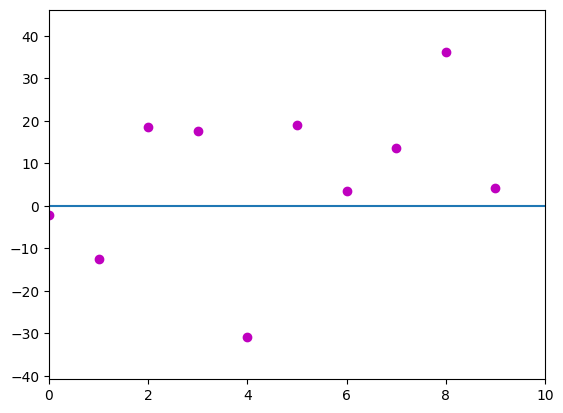

In [ ]:
maxi = 0
mini = 10000000
count = len(ridge.coef_)
maxi = max(np.max(ridge.coef_),maxi)
mini = min(np.min(ridge.coef_),mini)
print(ridge.coef_)
plt.plot([range(0,count)], [ridge.coef_],'mo')
plt.axis((0, count, mini - 10, maxi + 10))
plt.axline((0, 0), (maxi, 0))
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Score in train set: {:.4f}".format(lasso.score(X_train, y_train)))
print("Score in test set: {:.4f}".format(lasso.score(X_test, y_test)))

Score in train set: 0.5362
Score in test set: 0.4197


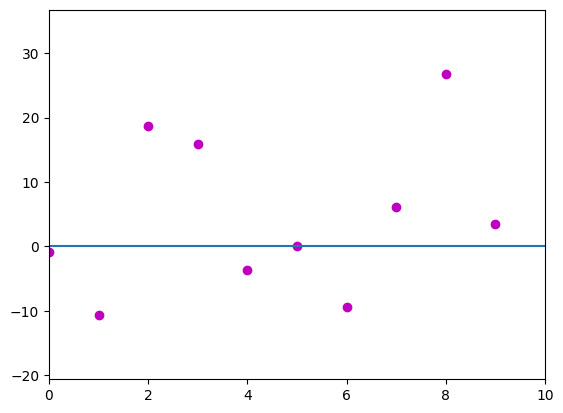

In [ ]:
maxi = 0
mini = 10000000
count = len(lasso.coef_)
maxi = max(np.max(lasso.coef_),maxi)
mini = min(np.min(lasso.coef_),mini)
plt.plot([range(0,count)], [lasso.coef_],'mo')
plt.axis((0, count, mini - 10, maxi + 10))
plt.axline((0, 0), (maxi+1, 0))
plt.show()

In [ ]:
ridgeCoef = ridge.coef_
lassoCoef = lasso.coef_
print("ridge.coef_: {}".format(ridge.coef_))
#print("ridge.intercept_: {}".format(ridge.intercept_))
print("lasso.coef_: {}".format(lasso.coef_))
#print("lasso.intercept_: {}".format(lasso.intercept_))

ridge.coef_: [ -2.07915418 -12.5050054   18.56120212  17.53370828 -30.78636928
  18.96016624   3.61559523  13.55452165  36.15592989   4.28183398]
lasso.coef_: [ -0.87959939 -10.62479754  18.66769543  15.95212993  -3.65184529
  -0.          -9.47563486   6.11526913  26.76775341   3.47215614]


In [ ]:
alpha_values = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]
#alpha_values = np.arange(0.001, 2, 0.01)
notZeroRidgeCoef = []
notZeroLassoCoef = []
len(ridgeCoef.nonzero()[0])
for alpha in alpha_values:
  ridge = Ridge(alpha).fit(X_train, y_train)
  lasso = Lasso(alpha).fit(X_train, y_train)
  notZeroRidgeCoef.append(len(ridge.coef_.nonzero()[0]))
  notZeroLassoCoef.append(len(lasso.coef_.nonzero()[0]))
print(notZeroRidgeCoef)
print(notZeroLassoCoef)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[10, 10, 10, 10, 10, 10, 10, 10, 9, 7, 7, 7, 4, 4, 3, 0, 0]


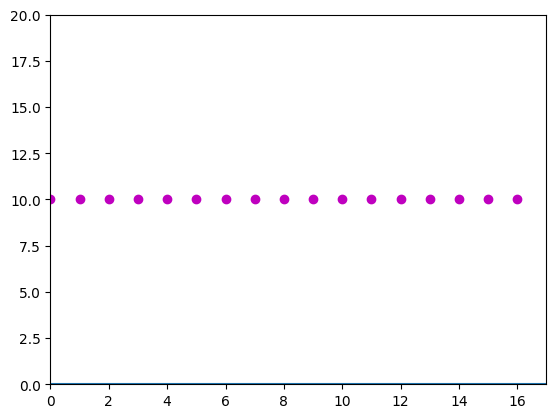

In [ ]:
maxi = 0
mini = 10000000
count = len(notZeroRidgeCoef)
maxi = max(np.max(notZeroRidgeCoef),maxi)
mini = min(np.min(notZeroRidgeCoef),mini)
plt.plot([range(0,count)], [notZeroRidgeCoef],'mo')
plt.axis((0, count, mini - 10, maxi + 10))
plt.axline((0, 0), (maxi+1, 0))
plt.show()

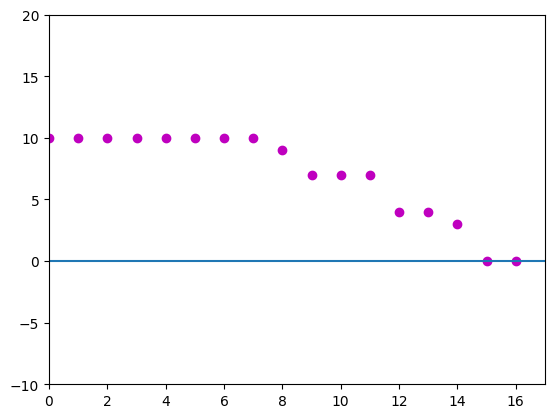

In [ ]:
maxi = 0
mini = 10000000
count = len(notZeroLassoCoef)
maxi = max(np.max(notZeroLassoCoef),maxi)
mini = min(np.min(notZeroLassoCoef),mini)
plt.plot([range(0,count)], [notZeroLassoCoef],'mo')
plt.axis((0, count, mini - 10, maxi + 10))
plt.axline((0, 0), (maxi+1, -0))
plt.show()

In [ ]:
# Посчитайте для Ridge регрессии следующие метрики: RMSE, MAE, R^2.
preds = ridge.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.77888272486063
MAE:  47.77766767135655
R2:  0.41415196344380634


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pandas as pd
#alpha_values = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]
alpha_values = np.arange(0.001, 2, 0.01)

grid_search = GridSearchCV(Ridge(),
                     {"alpha": alpha_values},
                     scoring = "neg_root_mean_squared_error",
                     cv=KFold(n_splits=5))

grid_search.fit(X_train, y_train)
alpha = alpha_values[grid_search.best_index_];
print('The best value of alpha is:', grid_search.best_params_)
print('The best score is:', grid_search.best_score_)

The best value of alpha is: {'alpha': 1.0309999999999997}
The best score is: -54.81243102705131


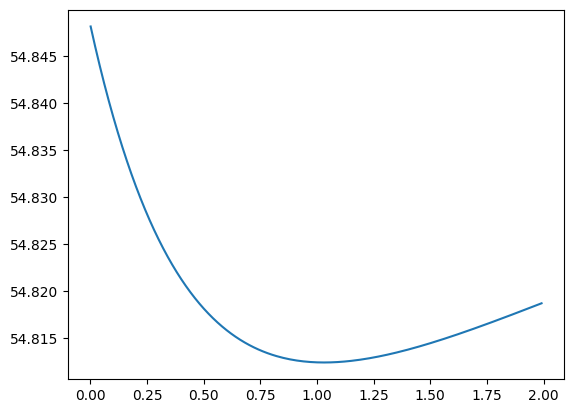

In [ ]:
grid_search.predict(X_test)
grid_search_results = pd.DataFrame(grid_search.cv_results_)
plt.plot(alpha_values, -grid_search.cv_results_["mean_test_score"])
plt.show()

In [ ]:
ridge = Ridge(alpha = alpha).fit(X_train, y_train)
preds = ridge.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.811597658472124
MAE:  47.1150931272799
R2:  0.41346454916744735


In [ ]:
grid_search = GridSearchCV(Ridge(),
                     {"alpha": alpha_values},
                     scoring = "neg_mean_absolute_error",
                     cv = KFold(n_splits=5))

grid_search.fit(X_train, y_train)
alpha = alpha_values[grid_search.best_index_];
print('The best value of alpha is:', grid_search.best_params_)
print('The best score is:', grid_search.best_score_)

The best value of alpha is: {'alpha': 0.5609999999999999}
The best score is: -43.47764933022263


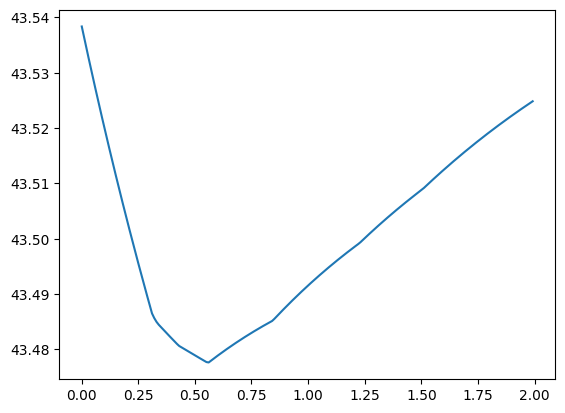

In [ ]:
grid_search.predict(X_test)
grid_search_results = pd.DataFrame(grid_search.cv_results_)
plt.plot(alpha_values, -grid_search.cv_results_["mean_test_score"])
plt.show()

In [ ]:
ridge = Ridge(alpha = alpha).fit(X_train, y_train)
preds = ridge.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.8456446138377
MAE:  47.14593076715566
R2:  0.41274871811218294


In [ ]:
grid_search = GridSearchCV(Ridge(),
                     {"alpha": alpha_values},
                     scoring = "r2",
                     cv = KFold(n_splits=5))

grid_search.fit(X_train, y_train)
alpha = alpha_values[grid_search.best_index_];
print('The best value of alpha is:', grid_search.best_params_)
print('The best score is:', grid_search.best_score_)

The best value of alpha is: {'alpha': 0.9609999999999999}
The best score is: 0.5058600420246296


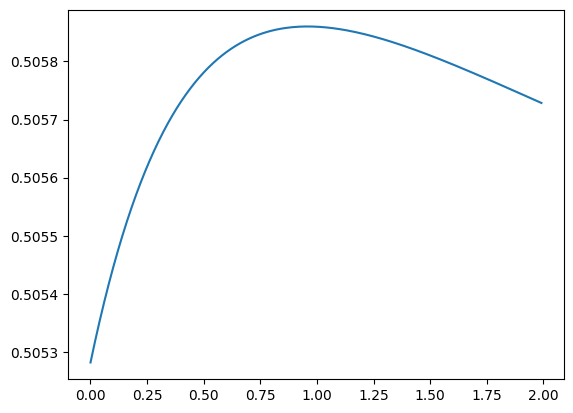

In [ ]:
grid_search.predict(X_test)
grid_search_results = pd.DataFrame(grid_search.cv_results_)
plt.plot(alpha_values, grid_search.cv_results_["mean_test_score"])
plt.show()

In [ ]:
ridge = Ridge(alpha = alpha).fit(X_train, y_train)
preds = ridge.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.81570041869689
MAE:  47.11913102149197
R2:  0.41337831251170254


MSE:  3115.133445349661


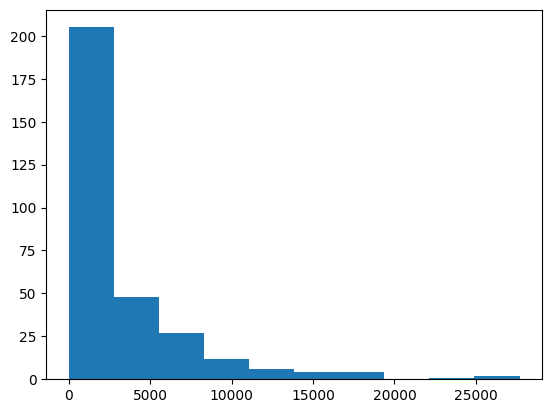

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
ridge = Ridge()
cv_pred = cross_val_predict(ridge,
                            X_train, y_train,
                            cv=KFold(n_splits=5).split(X_train,y_train))
ridge.fit(X_train, y_train)

print('MSE: ', mean_squared_error(y_test, ridge.predict(X_test)))

errors = (y_train - cv_pred) **2
plt.hist(errors)
plt.show()

In [ ]:
mask = np.where(errors<1400)[0]
print(mask.shape)
X_train_clear = pd.DataFrame(X_train).iloc[mask]
y_train_clear = pd.DataFrame(y_train).iloc[mask]
ridge.fit(X_train_clear, y_train_clear)
print(mean_squared_error(y_test, ridge.predict(X_test)))

(155,)
3101.684745516192


In [ ]:
preds = ridge.predict(X_test)
mse = mean_squared_error(y_test,preds)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test,preds)
r2=r2_score(y_test,preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.69277103463422
MAE:  47.04625777345564
R2:  0.4159594368450261
